# Author & Context

This project was completed by **Anass El Basraoui** on **November 13, 2021**, as part of my early learning journey in data science.

At the time, this was my **first-ever project** in data analysis and data visualization. It was conducted during my academic training, and it represents the very beginning of my hands-on experience with Python, Excel datasets, and analytical thinking.

Although basic in structure, this project laid the foundation for the data-driven mindset I developed in the following years — and remains a key milestone in my transition toward professional data science.


## Introduction

The importance of data in business today is paramount. Data drives commercial strategy, marketing initiatives, and customer relationship management. Investing in data management solutions has become a necessity for many organizations. But how can one capitalize effectively on data that is imprecise, incomplete, or even inaccessible? The value of data depends primarily on its quality. Data quality lies at the heart of many organizational challenges. The qualification process must begin as early as the data ingestion stage. Clean, reliable data brings high added value — but to reach that point, it must go through several steps: identifying the need, collecting, cleaning, and ultimately visualizing it.

Data visualization is an essential tool in Data Science. It serves as the foundation for analysis, exploration, and informed decision-making. It helps transform raw information into readable and meaningful insights for a wider audience. Accessibility is a key concern here — data should not be reserved for specialists only.

In our case, data visualization will help us respond to a real business scenario: a multinational executive wants to analyze the behavior of their sales across different countries. To answer this, we will use the full dataset, visualize it, and extract key insights regarding global sales trends, the contribution of each country to overall revenue, and which products are driving the most profit or volume.

All of this will be achieved using Python and a range of statistical and data visualization tools.


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
from plotly.offline import plot

# Data import 
df= pd.read_excel("Global Superstore.xls",parse_dates=["Order_Date", "Ship_Date"]) # Rather that object, Order_Date and Ship_Date are transformed into a Date time


# Exploratory Data Analysis (EDA): Data Acquisition & Overview

In [3]:
df.columns= [i.strip() for i in df.columns] 
print(df.shape)
display(df.sample(5))

(51290, 23)


,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
22571,IN-2012-78886,2012-05-31,2012-06-04,Second Class,SL-20155,Sara Luxemburg,Home Office,Tengzhou,Shandong,China,...,OFF-EN-10003508,Office Supplies,Envelopes,"GlobeWeis Peel and Seal, with clear poly window",74.790,3,0.0,35.1000,10.050,Medium
46297,CA-2012-105571,2012-11-07,2012-11-11,Standard Class,CP-12340,Christine Phan,Corporate,Miami,Florida,United States,...,OFF-BI-10003305,Office Supplies,Binders,Avery Hanging File Binders,16.146,9,0.7,-12.9168,1.010,Medium
26088,SF-2014-3260,2014-10-03,2014-10-07,Standard Class,LT-7110,Liz Thompson,Consumer,Pretoria,Gauteng,South Africa,...,OFF-ELD-10000819,Office Supplies,Storage,"Eldon Trays, Industrial",48.450,1,0.0,22.7700,7.540,High
25041,MX-2013-109078,2013-11-21,2013-11-26,Standard Class,PP-18955,Paul Prost,Home Office,Villa Canales,Guatemala,Guatemala,...,TEC-PH-10001427,Technology,Phones,"Motorola Headset, Full Size",162.060,3,0.0,40.5000,8.195,Medium
16023,ID-2014-10321,2014-08-27,2014-08-27,Same Day,BF-10975,Barbara Fisher,Corporate,Rockhampton,Queensland,Australia,...,OFF-SU-10003559,Office Supplies,Supplies,"Kleencut Ruler, Steel",58.320,5,0.1,7.0200,17.900,Critical


In [4]:
df.columns

Index(['Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID',
       'Customer_Name', 'Segment', 'City', 'State', 'Country', 'Postal Code',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order_ID        51290 non-null  object        
 1   Order_Date      51290 non-null  datetime64[ns]
 2   Ship_Date       51290 non-null  datetime64[ns]
 3   Ship_Mode       51290 non-null  object        
 4   Customer_ID     51290 non-null  object        
 5   Customer_Name   51290 non-null  object        
 6   Segment         51290 non-null  object        
 7   City            51290 non-null  object        
 8   State           51290 non-null  object        
 9   Country         51290 non-null  object        
 10  Postal Code     9994 non-null   float64       
 11  Market          51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Product ID      51290 non-null  object        
 14  Category        51290 non-null  object        
 15  Su

In [6]:
df.describe()

,Order_Date,Ship_Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290,51290,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375818
min,2011-01-01 00:00:00,2011-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,2014-12-31 00:00:00,2015-01-07 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,NaN,NaN,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296810


In [7]:
df.nunique() 

Order_ID          25035
Order_Date         1430
Ship_Date          1464
Ship_Mode             4
Customer_ID        1590
Customer_Name       795
Segment               3
City               3636
State              1094
Country             147
Postal Code         631
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             27200
Quantity             14
Discount             29
Profit            28234
Shipping Cost     17095
Order Priority        4
dtype: int64

In [8]:
print((df["Sub-Category"].nunique()))
print((df["Category"].nunique()))
print((df["Country"].nunique()))
print((df["Region"].nunique()))
print((df["Customer_Name"].nunique()))

17
3
147
13
795


After importing the dataset with Pandas, we begin by exploring its structure.

The dataset contains **51,290 rows** and **23 columns**, including 5 **quantitative variables**:
`['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']`.

Below is a brief description of the columns:

| Variable         | Description                                 |
|------------------|---------------------------------------------|
| `Order_ID`       | Unique order identifier                     |
| `Order_Date`     | Order placement date                        |
| `Ship_Date`      | Shipping date                               |
| `Ship_Mode`      | Shipping method                             |
| `Customer_ID`    | Unique customer ID                          |
| `Customer_Name`  | Customer's full name                        |
| `Segment`        | Customer segment                            |
| `City`           | City where the sale occurred                |
| `State`          | State or region of the sale                 |
| `Country`        | Country of the sale                         |
| `Postal Code`    | Postal/ZIP code                             |
| `Market`         | Market type                                 |
| `Region`         | Global region                               |
| `Product ID`     | Unique product identifier                   |
| `Category`       | Product category                            |
| `Sub-Category`   | Product sub-category                        |
| `Product Name`   | Full product name                           |
| `Sales`          | Sale price (revenue per order)              |
| `Quantity`       | Quantity sold                               |
| `Discount`       | Discount applied                            |
| `Profit`         | Profit generated from the sale              |
| `Shipping Cost`  | Cost of shipping                            |
| `Order Priority` | Priority level of the order                 |

---

From this initial exploration, we can conclude that some columns — such as `Order_ID`, `Customer_ID`, `Postal Code`, or `Product ID` — are **not relevant for visualization purposes**, even though they may be useful in other analytical contexts (e.g., forecasting, logistics, CRM).

Regarding the **date ranges**:
- `Order_Date` ranges from **2011 to 2014**
- `Ship_Date` ranges from **2011 to 2015**

We also observe that the dataset covers **795 unique customers** across **147 countries**, grouped into **13 global regions** such as:
`['East', 'Oceania', 'Central', 'Africa', 'West', 'South', 'Central Asia', 'EMEA', 'North Asia', 'North', 'Caribbean', 'Southeast Asia', 'Canada']`.

This initial inspection prepares us for deeper transformations and visualizations in the next steps.


We can see that there was 451 orders from Morocco, including 129 from Casablanca, the price of purchases is 29798, which allowed a profit of 6872.

In [9]:
orders_mar = (df.Country=='Morocco').sum()
orders_casa = ((df['Country']=='Morocco') & (df['City']=='Casablanca')).sum() # Good practice to avoid the problem if the same city name but different coutries

print(f"{orders_mar} orders originating from Morocco (2011-2014)")
print(f"{orders_casa} orders originating from Casablanca (Morocco)")
print(f'Orders from Casablanca cost {sum(df[(df["Country"]=="Morocco") & (df["City"]=="Casablanca")]["Sales"])}')
print(f'Orders from Casablanca generate {sum(df[(df["Country"]=="Morocco") & (df["City"]=="Casablanca")]["Profit"])} as profit')

451 orders originating from Morocco (2011-2014)
129 orders originating from Casablanca (Morocco)
Orders from Casablanca cost 29797.76999999999
Orders from Casablanca generate 6872.399999999999 as profit


## 3. Data Transformation and Filtering

During the exploratory phase, we identified several columns that do not contribute meaningful information for the purpose of data visualization.

For instance, columns such as:

- `Order_ID`
- `Customer_ID`
- `Customer_Name`
- `Postal Code`
- `Product ID`

...may be useful in other contexts (e.g., logistics, CRM, unique identification), but they are **not relevant** in a visualization-focused analysis. Therefore, these columns will be removed from the dataset to streamline our analysis and reduce noise.

In [10]:
df.drop(["Order_ID","Customer_ID","Postal Code","Product ID"],inplace=True,axis=1)
df.head()

,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,2012-07-31,2012-07-31,Same Day,Rick Hansen,Consumer,New York City,New York,United States,US,East,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,2013-02-05,2013-02-07,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,2013-10-17,2013-10-18,First Class,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,2013-01-28,2013-01-30,First Class,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,2013-11-05,2013-11-06,Same Day,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [11]:
df.isna().sum() 

Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [12]:
df.duplicated().sum()

0

Fortunately, we have no missing or duplicated data.

# Sales Analysis

In [13]:
df['year'] = df['Order_Date'].dt.year
df['month'] = df['Order_Date'].dt.month
df['day'] = df['Order_Date'].dt.day

## Revenue Over Time
Revenue (or *sales revenue*) is a key indicator used to evaluate a company’s ability to convert its commercial potential into actual transactions. It reflects how well the business can sell its products or services.

The chart below shows the **evolution of total revenue by year**. We observe a **steady increase** over time:

- From approximately **2,259,450** in 2011  
- To around **4,299,865** in 2014  
- This represents a **growth of nearly 90%** over the 4-year period

The growth pattern appears to be **almost linear**, indicating consistent business performance year over year.

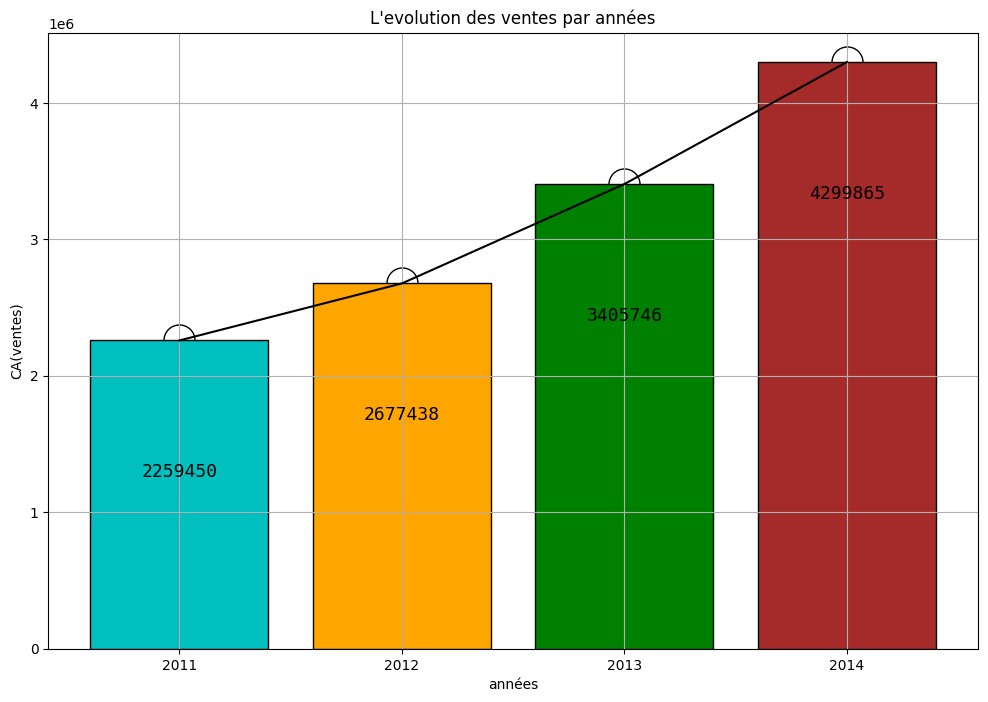

In [15]:
plt.figure(figsize=(12,8))
x=['2011', '2012', '2013', '2014']
y=list(df.groupby(["year"])["Sales"].sum())
plt.scatter(x,y,c='w',edgecolor="black",marker='o',s=500)#marker=P X H D s ...
plt.plot(x,y,c='black')
plt.bar(x,y,color=['c','orange','g','brown'],edgecolor="black")

plt.annotate("Evolution des ventes",xy=(2013,4300000),xytext=(2010.7,3100000),arrowprops={'facecolor':'w','shrink':100000})


for i in range(len(x)):
    plt.text(x[i],y[i]-1000000,str(int(y[i])),fontfamily='monospace',fontsize=13,horizontalalignment='center')

plt.xlabel("années")
plt.ylabel("CA(ventes)")
plt.title("L'evolution des ventes par années")
plt.grid(True)
plt.show()


### Top 5 Countries by Total Revenue (Overall Period)

Independently of the time dimension, the Top 5 countries contributing to the company’s total revenue between 2011 and 2014 are:

- **United States** with more than 2,297,200 in sales  
- **Australia** with approximately 1,000,000  
- **France**  
- **China**  
- **Germany**

The treemap below illustrates the distribution of total revenue across countries, highlighting relative contribution to the company’s overall performance during the four-year period.

In [16]:
fig=px.treemap(df,path=["Country"],values='Sales')
fig

We can clearly see that the United States is the leading contributor to the company’s revenue. More than **23% of the total revenue** comes from this country, as shown in the following chart.


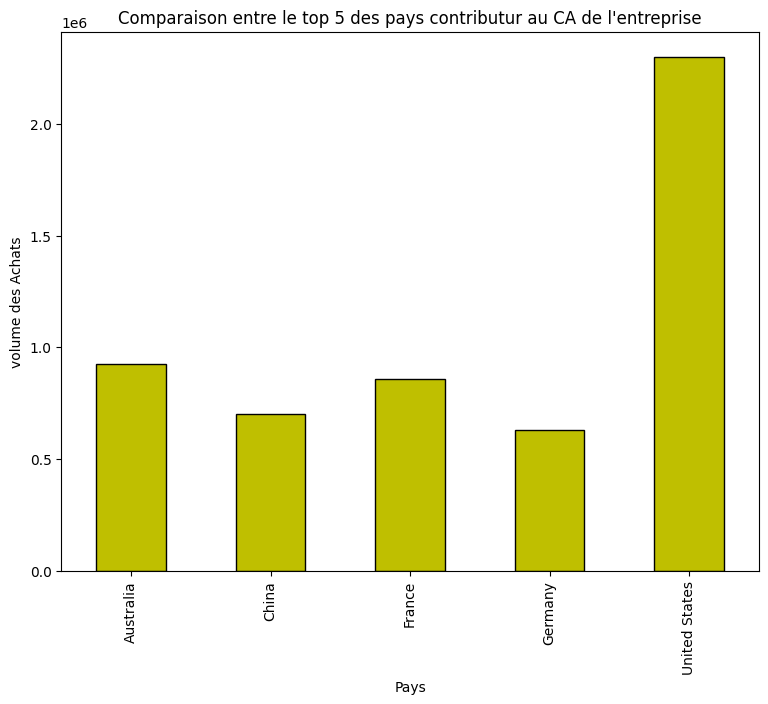

In [17]:
plt.figure(figsize=(9,7))
plt.title("Comparaison entre le top 5 des pays contributur au CA de l'entreprise")
df1=df[(df["Country"]=="United States") | (df["Country"]=="France")|(df["Country"]=="Australia")|(df["Country"]=="China")|(df["Country"]=="Germany")]
df1.groupby(["Country"])["Sales"].sum().plot.bar(color='y',edgecolor="black")
plt.xlabel("Pays")
plt.ylabel("volume des Achats")
plt.show()

We selected only the countries contributing more than 100,000 in total revenue in order to keep the visualization clear and readable. Within this filtered subset, the United States accounts for **23%** of total revenue. However, when considering all countries worldwide, the U.S. represents **18.17%** of the company's global revenue.

We can also note that the Top 5 countries mentioned above contribute **approximately half of the company’s total revenue (42.7%)**, while the remaining **142 countries** account for the other **58.3%**.

In [18]:
print(df[(df["Country"]=="United States")]["Sales"].sum()/df["Sales"].sum())
print(df[(df["Country"]=="United States") | (df["Country"]=="France")|(df["Country"]=="Australia")|(df["Country"]=="China")|(df["Country"]=="Germany")]["Sales"].sum()/df["Sales"].sum())

0.18170460852410536
0.4279825220015614


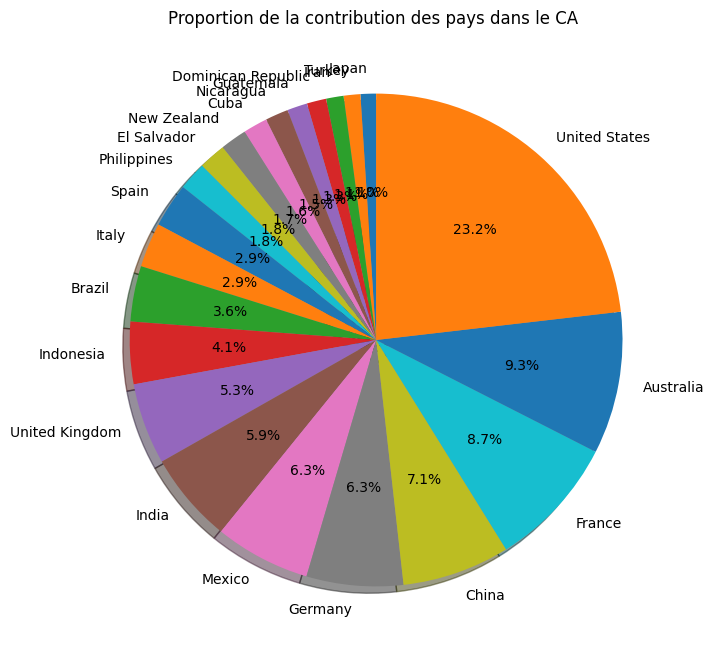

In [19]:
_ = df.groupby(["Country"]).agg({"Sales": 'sum'})
_ = _[_.Sales > 100000].sort_values(by='Sales', ascending=True)

plt.figure(figsize=(12,8))
plt.pie(_.Sales, labels=_.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Proportion de la contribution des pays dans le CA ")
plt.show()

## Contribution by Year

Based on the chart below, we can quickly conclude that the United States, Australia, and France consistently remain the company’s most reliable markets across all years. The remaining eight countries (ranked 3 to 10) contribute roughly similar revenue levels, which explains the variability and changes in their ranking from one year to another.


In [20]:
fig=px.treemap(df,path=["year","Country"],values='Sales')
fig

In the following figure, we present a summary of the company's sales distribution across the following variables: **Market** (global markets), **Region**, **Country**, and **City**.

In [21]:
fig=px.treemap(df,path=["Market","Region","Country","City"],values='Sales')
fig

## Profit


## Profit Evolution by Year

Profit, or commercial margin, represents the difference between total sales (revenue) and the cost of goods sold. It reflects the company’s ability to manage its purchasing and selling operations efficiently.

From the chart, we observe that the company’s profit increases steadily year after year. Using rounded values, profit rises from **248,940 in 2011** to **504,165 in 2014**, which corresponds to an increase of **255,225**, nearly a doubling over the four-year period.

The growth pattern appears to be almost linear. Another notable observation is that the profit curve has a very similar shape to the revenue curve. This naturally raises an important question: **is there a relationship between revenue and profit?** We will address this question in the next section.

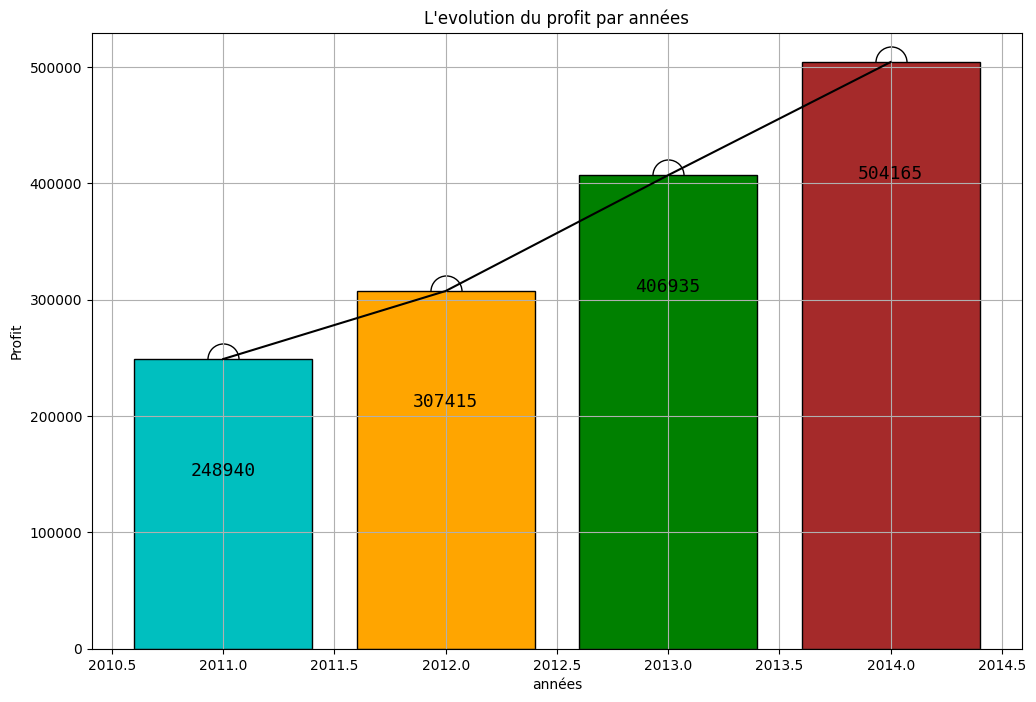

In [22]:
plt.figure(figsize=(12,8))
x=[i for i in range(2011,2015)]
y=list(df.groupby(["year"])["Profit"].sum())
plt.scatter(x,y,c='w',edgecolor="black",marker='o',s=500)#marker=P X H D s ...
plt.plot(x,y,c='black')
plt.bar(x,y,color=['c','orange','g','brown'],edgecolor="black")

for i in range(len(x)):
    plt.text(x[i],y[i]-100000,str(int(y[i])),fontfamily='monospace',fontsize=13,horizontalalignment='center')

plt.xlabel("années")
plt.ylabel("Profit")
plt.title("L'evolution du profit par années")
plt.grid(True)
plt.show()

Let us analyze the company’s financial situation by calculating the profit margin:
  
$$
\text{Profit Margin} = \frac{\text{Profit}}{\text{Revenue}} = 0.116
$$
This is a **low value**.




In [23]:
df["Profit"].sum()/df["Sales"].sum()

0.11607332960995605

### What can we infer from this?

A margin this low suggests that:

- the company may **not be selling at a high enough price**,  
- or it may be **buying its products or raw materials at too high a cost** (high production or procurement expenses).

In both cases, the company would need to **adjust its financial strategy**, renegotiate with suppliers, or revise its pricing policy in order to improve profitability.


## Countries Contributing the Most to the Company’s Profit

### Overall (Independent of Time)

A first observation is that it is difficult to predict the ranking of countries by profit using only their revenue. For example, Australia consistently ranks second in terms of revenue, yet it drops to **7th place** when looking at profit. The same situation occurs with France. 

This indicates that while profit is strongly correlated with revenue at a **global** level, this relationship becomes weaker when looking at **individual countries**.

The Top 5 countries contributing to the company’s profit between 2011 and 2014 are:

1. **United States** — more than 286,300  
2. **China** — approximately 150,000  
3. **India**  
4. **United Kingdom**  
5. **France**

The chart below illustrates the distribution of profit among these countries.


In [24]:
fig=px.treemap(df,path=["Country"],values='Profit')
fig

It is clear that the United States is the leading contributor to profit, with nearly 20% of the company’s profit coming from this country, as shown in the graph on the following chart

In [25]:
df[(df["Country"]=="United States")]["Profit"].sum()/df["Profit"].sum()

0.19516549026799146

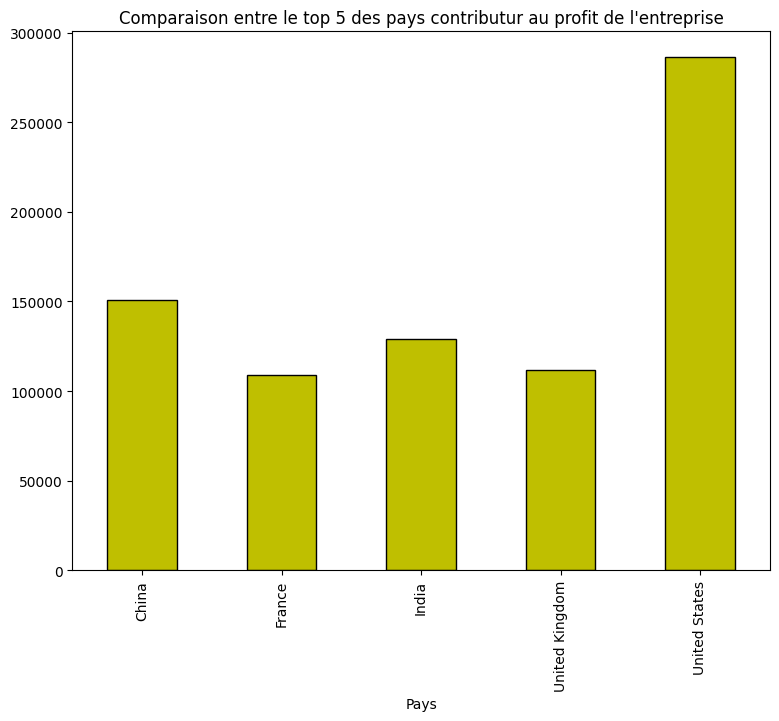

In [26]:
plt.figure(figsize=(9,7))
plt.title("Comparaison entre le top 5 des pays contributur au profit de l'entreprise")
df1=df[(df["Country"]=="United States") | (df["Country"]=="France")|(df["Country"]=="India")|(df["Country"]=="China")|(df["Country"]=="United Kingdom")]
df1.groupby(["Country"])["Profit"].sum().plot.bar(color='y',edgecolor="black")
plt.xlabel("Pays")
plt.ylabel("")
plt.show()

Furthermore, the five countries mentioned above collectively contribute over half of the company’s profit (53.6%), whereas the remaining 142 countries account for only 47.4%.


In [27]:
df[(df["Country"]=="United States") | (df["Country"]=="France")|(df["Country"]=="India")|(df["Country"]=="China")|(df["Country"]=="United Kingdom")]["Profit"].sum()/df["Profit"].sum()

0.5363570710895871

# Relationship between Profit and Revenue

Now let us return to our question: is there a relationship (correlation) between Revenue and Profit?  
To explore this, we will turn to the following figures.

<Figure size 1000x700 with 0 Axes>

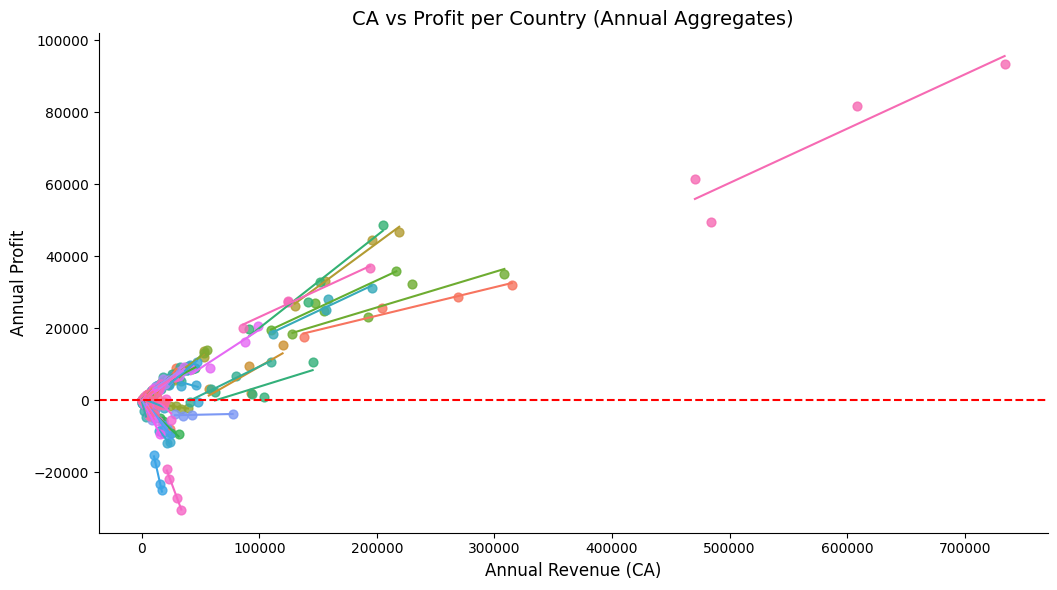

In [38]:
# Aggregate by Country and year
country_year = (
    df.groupby(["Country", "year"])
      .agg(
          CA=("Sales", "sum"),        # total revenue per year
          Profit=("Profit", "sum")    # total profit per year
      )
      .reset_index()
)

country_year.head()

top_countries = (
    country_year.groupby("Country")["CA"]
    .sum()
    .sort_values(ascending=False)
    .head(100)           # choose how many you want
    .index
)

data_plot = country_year[country_year["Country"].isin(top_countries)]


plt.figure(figsize=(10, 7))

g=sns.lmplot(
    data=data_plot,
    x="CA",
    y="Profit",
    hue="Country",      # one regression line per country
    height=6,
    aspect=1.3,
    markers="o",
    scatter_kws={"s": 40, "alpha": 0.8},
    line_kws={"linewidth": 1.5},
    ci=None
)

plt.title("CA vs Profit per Country (Annual Aggregates)", fontsize=14)
plt.xlabel("Annual Revenue (CA)", fontsize=12)
plt.ylabel("Annual Profit", fontsize=12)
plt.axhline(y=0, color='r', linestyle='--')

plt.tight_layout()
g._legend.remove()   # remove legend

plt.show()


In [39]:
# country_year from before
country_year = (
    df.groupby(["Country", "year"])
      .agg(CA=("Sales", "sum"),
           Profit=("Profit", "sum"))
      .reset_index()
)

def country_slope(sub):
    # linear regression: Profit ~ CA for this country
    x = sub["CA"].values
    y = sub["Profit"].values
    if len(np.unique(x)) == 1:
        return np.nan  # cannot fit if all CA equal
    slope, intercept = np.polyfit(x, y, 1)
    return slope

slopes = (
    country_year.groupby("Country")
    .apply(country_slope)
    .rename("slope_CA_to_Profit")
)

mean_profit = (
    country_year.groupby("Country")["Profit"]
    .mean()
    .rename("mean_profit")
)

summary = pd.concat([slopes, mean_profit], axis=1)

# Countries with negative slope AND negative mean profit
bad_countries = summary[
    (summary["slope_CA_to_Profit"] < 0) &
    (summary["mean_profit"] < 0)
].sort_values("mean_profit")

bad_countries


C:\Users\F1302\AppData\Local\Temp\ipykernel_20808\2602251570.py:20: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,slope_CA_to_Profit,mean_profit
Country,,
Turkey,-0.882261,-24611.808000
Nigeria,-1.451670,-20187.679500
Netherlands,-0.409287,-10267.518750
Honduras,-0.304329,-7370.592850
Pakistan,-0.385911,-5611.662000
Argentina,-0.377463,-4673.449180
Panama,-0.386050,-4430.863120
Sweden,-0.645302,-4379.841750
South Korea,-0.498801,-3198.207750


### Interpretation

The regression lines reveal that some countries display a **negative relationship** between annual revenue (CA) and annual profit. In other words, for these countries, **higher revenue coincides with lower profit**.

This phenomenon suggests that increased sales volumes do not necessarily translate into higher profitability. Possible explanations include excessive discounting, high purchasing or shipping costs, unfavorable local taxes, or a product mix dominated by low-margin items. Such countries represent strategic risk zones where revenue growth does not improve financial performance.

For some countries (27 countries), not only is the profit always negative, but the regression line also has a **negative slope**. This means that higher annual revenue in these markets is associated with even larger losses. In other words, these countries systematically destroy value: increasing sales volume actually worsens the financial situation. Such markets should be considered for a deep strategic review (pricing, cost structure, product mix, or even withdrawal).


## Correlation

In [41]:
df

,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,City,State,Country,Market,Region,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,year,month,day
0,2012-07-31,2012-07-31,Same Day,Rick Hansen,Consumer,New York City,New York,United States,US,East,...,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.570,Critical,2012,7,31
1,2013-02-05,2013-02-07,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,...,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical,2013,2,5
2,2013-10-17,2013-10-18,First Class,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,...,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium,2013,10,17
3,2013-01-28,2013-01-30,First Class,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,...,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium,2013,1,28
4,2013-11-05,2013-11-06,Same Day,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,...,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical,2013,11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2014-06-19,2014-06-19,Same Day,Katrina Edelman,Corporate,Kure,Hiroshima,Japan,APAC,North Asia,...,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.010,Medium,2014,6,19
51286,2014-06-20,2014-06-24,Standard Class,Zuschuss Carroll,Consumer,Houston,Texas,United States,US,Central,...,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.010,Medium,2014,6,20
51287,2013-12-02,2013-12-02,Same Day,Laurel Beltran,Home Office,Oxnard,California,United States,US,West,...,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.010,High,2013,12,2
51288,2012-02-18,2012-02-22,Standard Class,Ross Baird,Home Office,Valinhos,São Paulo,Brazil,LATAM,South,...,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.003,Medium,2012,2,18


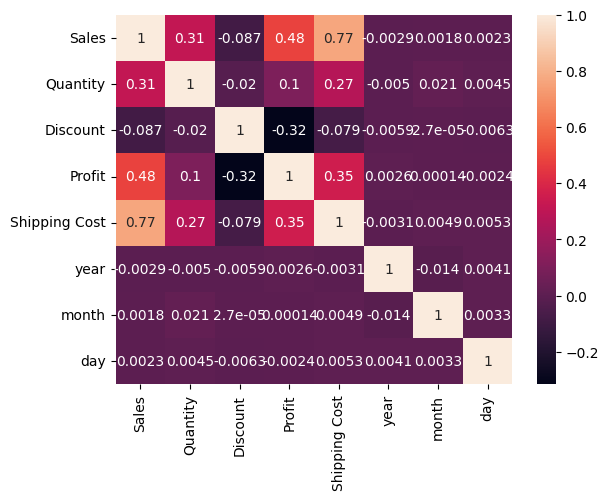

In [44]:
c=df.select_dtypes('number').corr()
sns.heatmap(c,annot=True)
plt.show()

We will not limit our analysis to the correlation between *Sales* and *Profit*.  
It can be observed that most variables are independent of each other, except for *Shipping Cost* and *Sales*. This is expected: as the selling price increases, taxes or customs charges also rise.  

What is less obvious, however, is the weak dependence between *Sales* and *Profit* at the level of individual orders.  
So how can this be explained?


At first glance, one might assume that selling a product at a high price automatically leads to greater profit.  
However, this is not always true: if the selling price is lower than the purchase price, losses occur.  
Thus, even if sales reach millions of dollars, profit can still be negative. This is particularly evident during times of crisis, when prices fall sharply — selling more in such conditions often results in losses.  

For this reason, the correlation between revenue and profit is not strong at the level of individual orders.  
In short, across different orders, an increase in revenue does not necessarily imply an increase in profit.


But why do the shapes of the profit graph and the revenue graph look relatively similar?  
**SURPRISE!!!**  
This is indeed the reality: as mentioned earlier at the macro level, Profit depends almost entirely on Revenue.  
For this company, Profit is correlated with Revenue at **99.8%**.


In [45]:
df.groupby(["year"])["Sales"].sum().corr(df.groupby(["year"])["Profit"].sum())


0.9981053840984879

But why is this the case?  
The company is not foolish enough to sell without making a profit — otherwise, it would not survive. Its objective is to minimize losses. When comparing losses with gains over the course of a year, the losses become negligible.  

However, at the level of a single order, losses can be significant.  
Overall, if the company sells a lot, it is because it has earned a lot.  

While resolving this issue, I was reminded of the series  

$$
\sum_{j=0}^{\infty} \frac{1}{n} \;\;\to\; +\infty, 
\quad \text{even though } \frac{1}{n} \to 0 \text{ as } n \to +\infty
$$


  
which diverges, even though 1/n -> 0 as n -> +\infty\.  
In the same way, even if the correlation between individual variables (orders, in this case) is weak, at the global level there can be a very strong correlation.


# Products

## Contribution of Products to Total Revenue (CA)

In [49]:
df.groupby(["Category","Sub-Category"]).agg({'Sales':'sum'})

Sales
Category        Sub-Category              
Furniture       Bookcases     1.466572e+06
                Chairs        1.501682e+06
                Furnishings   3.855783e+05
                Tables        7.570419e+05
Office Supplies Appliances    1.011064e+06
                Art           3.720920e+05
                Binders       4.619115e+05
                Envelopes     1.709043e+05
                Fasteners     8.324232e+04
                Labels        7.340403e+04
                Paper         2.442917e+05
                Storage       1.127086e+06
                Supplies      2.430742e+05
Technology      Accessories   7.492370e+05
                Copiers       1.509436e+06
                Machines      7.790601e+05
                Phones        1.706824e+06

In [70]:
a=df.groupby(["Category","Sub-Category"]).agg({'Sales':'sum'})['Sales']
b=df.groupby(["Category"]).agg({'Sales':'sum'})["Sales"]
d=df["Sales"].sum()

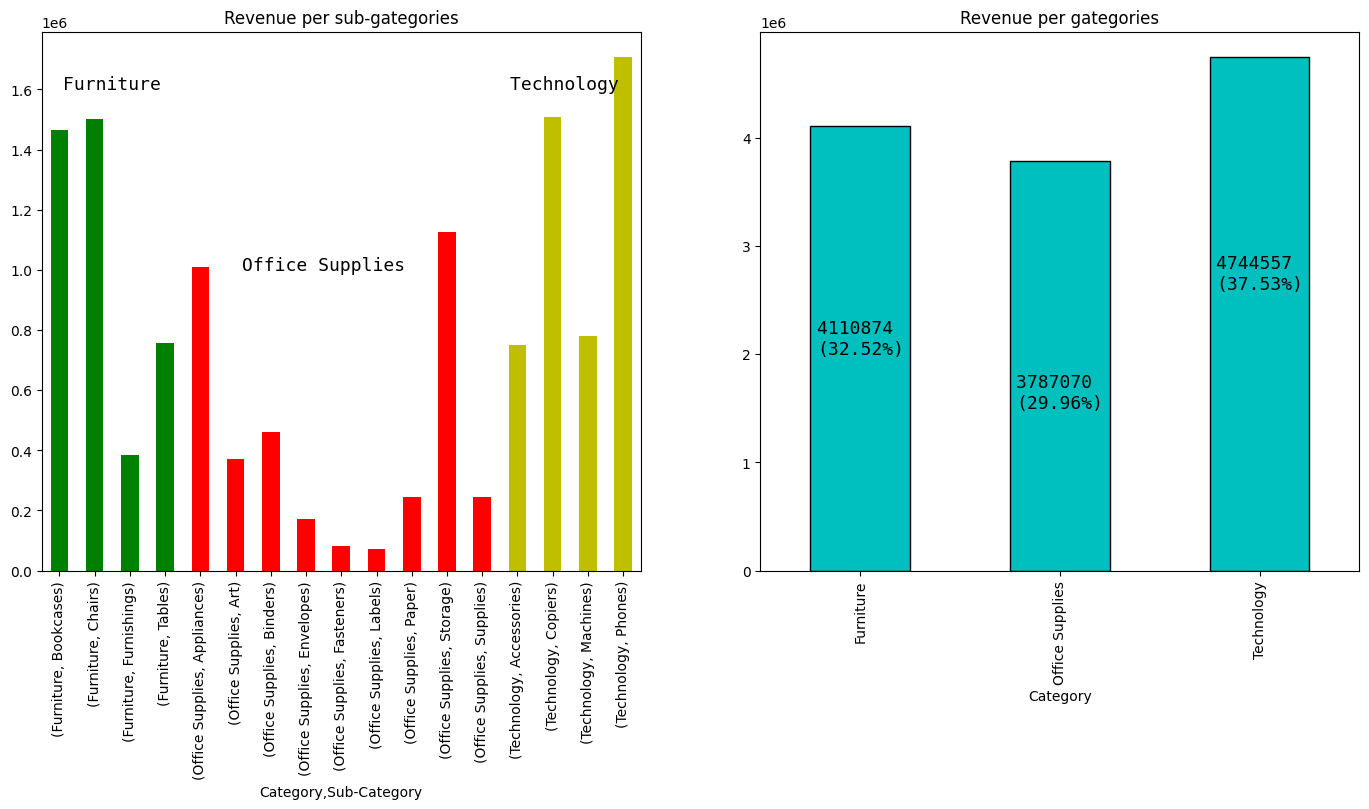

In [73]:
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
a.plot.bar(color=["g"]*4+["r"]*9+["y"]*4)
plt.title("Revenue per sub-gategories")
plt.text(1.5,1600000,"Furniture",fontfamily='monospace',fontsize=13,horizontalalignment='center')
plt.text(7.5,1000000,"Office Supplies",fontfamily='monospace',fontsize=13,horizontalalignment='center')
plt.text(14.5,1600000,"Technology ",fontfamily='monospace',fontsize=13,horizontalalignment='center')


plt.subplot(1,2,2)

b.plot.bar(color="c",edgecolor="black")
plt.text(0,2000000,f"4110874 \n({round(4110874/d*100,2)}%)",fontfamily='monospace',fontsize=13,horizontalalignment='center')
plt.text(1,1500000,f"3787070 \n({round(3787070/d*100,2)}%)",fontfamily='monospace',fontsize=13,horizontalalignment='center')
plt.text(2,2600000,f"4744557 \n({round(4744557/d*100,2)}%)",fontfamily='monospace',fontsize=13,horizontalalignment='center')
plt.title("Revenue per gategories")
plt.show()

We observe that the Technology category, which is the most popular, generated more than 4,744,557 in revenue over four years (37.5% of total revenue). Next comes the Furniture category, with more than 4,110,874 in revenue over the same period (32.52%), followed by Office Supplies, which reached 3,787,070 (around 20%).

Within the first category, Phones (1.6 million in revenue) contributed the most to the company’s turnover, it is the highest-revenue sub-category overall, followed by Copiers, Machines, and finally Accessories (780,000 in revenue).

In the second category, Chairs and Bookcases are the main revenue drivers, generating up to 1,501,682, unlike the two other products, Tables and Furnishings.

As for the last category, it contains sub-categories that contribute only marginally to the company’s revenue.

In short, everything is summarized in this graph.

In [75]:
fig=px.treemap(df,path=["Sub-Category"],values='Sales')
fig

In [862]:
len(df["Product Name"].unique())

3788

In [861]:
a=df.groupby(["Product Name"]).sum()["Sales"]
a[a==a.max()]


Product Name
Apple Smart Phone, Full Size    86935.7786
Name: Sales, dtype: float64

We can also see that among 3788 products, the telephone product contributed a large share to the revenue with a contribution of 86936.

## Contribution of Products to Profit

In [78]:
a=df.groupby(["Category","Sub-Category"]).agg({"Profit": 'sum'})["Profit"]
b=df.groupby(["Category"]).agg({"Profit": 'sum'})["Profit"]
d=df["Profit"].sum()

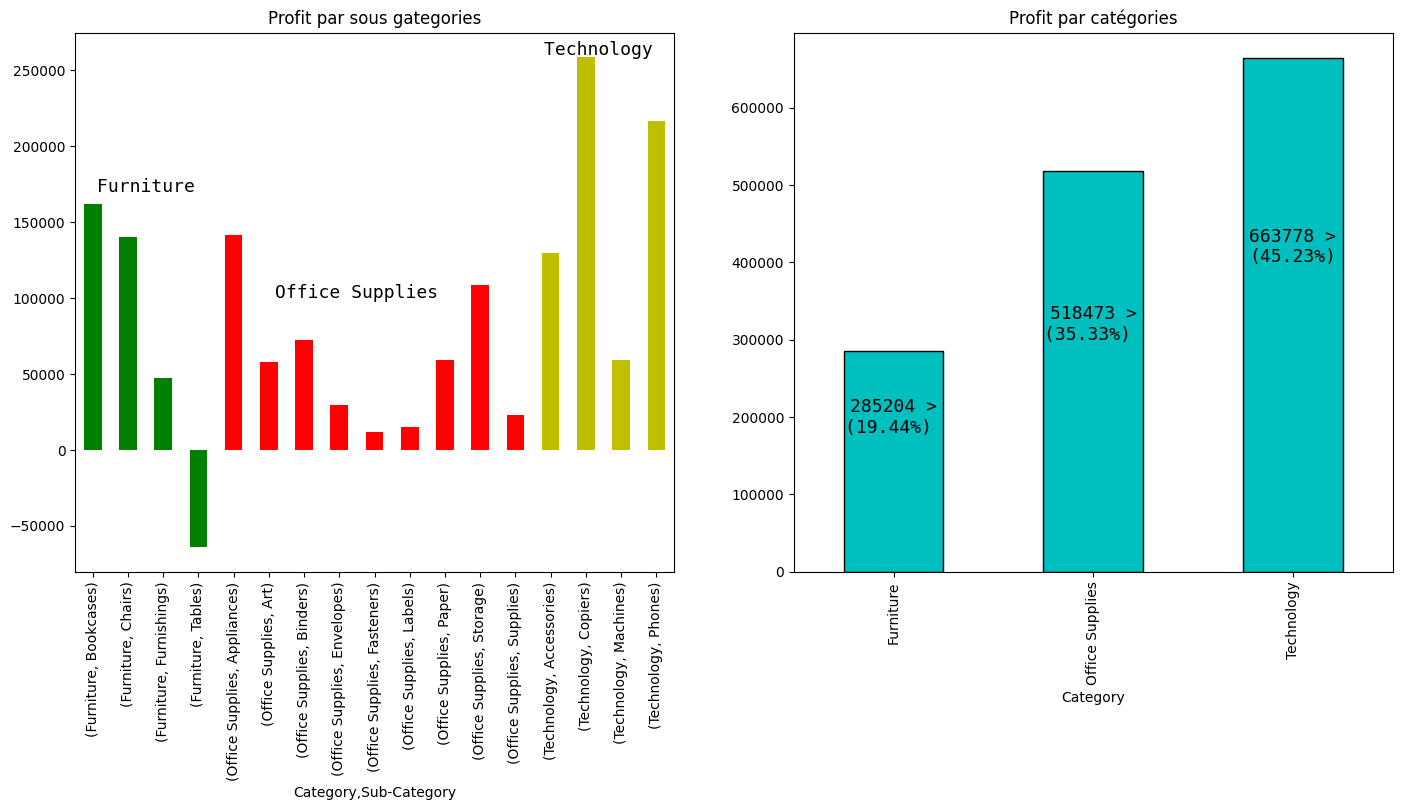

In [79]:
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
a.plot.bar(color=["g"]*4+["r"]*9+["y"]*4)
plt.title("Profit par sous gategories")
plt.text(1.5,170000,"Furniture",fontfamily='monospace',fontsize=13,horizontalalignment='center')
plt.text(7.5,100000,"Office Supplies",fontfamily='monospace',fontsize=13,horizontalalignment='center')
plt.text(14.5,260000,"Technology ",fontfamily='monospace',fontsize=13,horizontalalignment='center')


plt.subplot(1,2,2)

b.plot.bar(color="c",edgecolor="black")
plt.text(0,180000,f"285204 >\n({round(285204/d*100,2)}%) ",fontfamily='monospace',fontsize=13,horizontalalignment='center')
plt.text(1,300000,f"518473 >\n({round(518473/d*100,2)}%) ",fontfamily='monospace',fontsize=13,horizontalalignment='center')
plt.text(2,400000,f"663778 >\n({round(663778/d*100,2)}%)",fontfamily='monospace',fontsize=13,horizontalalignment='center')
plt.title("Profit par catégories")
plt.show()

In [80]:
a=df.groupby(["Product Name"]).agg({"Profit": 'sum'})["Profit"]
a[a==a.max()]

Product Name
Canon imageCLASS 2200 Advanced Copier    25199.928
Name: Profit, dtype: float64

In [81]:
fig=px.treemap(df,path=["Sub-Category"],values='Sales')
fig